Dataset link: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (10,6)
import numpy as np

In [169]:
df = pd.read_csv('/content/drive/MyDrive/Facultate/year1-sem2/big-data/data/melbourne-housing-market.csv')
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [171]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [172]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [173]:
# removing entries with no price
df = df[df['Price'].notna()]
print(f'Cleaned dataframe size: {len(df)}')

Cleaned dataframe size: 27247


In [174]:
def check_float_column(df, column_name, xlabel, nan_replacement=-1):
  nanCount = sum(df[column_name].isnull())
  if nanCount > 0:
    print(f"Column has {nanCount} NaN values! Replacing them with {nan_replacement}")
    column = list(df[column_name].fillna(nan_replacement))
  else:
    column = list(df[column_name])
  column_sorted = sorted(column)
  x = [i for i in range(1, len(column) + 1)]
  plt.plot(x, column_sorted)
  plt.xlabel("Houses")
  plt.ylabel(column_name)
  plt.show()

  plt.hist(column_sorted, bins=30)
  plt.title(column_name)
  plt.xlabel(xlabel)
  plt.ylabel("House count")
  plt.show()

  print(df[column_name].describe())

  zero_value = sum(df[column_name] == 0)

  print()
  print(f"There are {zero_value} properties with a value of 0 for {column_name}")

List of text features (we can pick some that seem usefull, embed them with BOW/TF-IDF and merge them all into one column):
* Suburb - seems important
* Address - seems important
* Type - enum value check kaggle
* Method - enum value check kaggle
* Seller - real este agent name, could be important?
* CouncilArea - governing council for the area - probably not important
* Regionname - general Region (West, North West, North, North east, etc)

List of numeric features:
* Rooms - # of rooms - important
* Price - target feature
* Date - date sold - could also be important if AUS house market fluctuated in the time data was scraped
* Distance - distance to Sydney central business district in KM - not important since we have postcode
* Postcode - maybe pick between this and distance - important
* Bedroom2 - beedrom count scraped from other sources - perhaps inaccurate
* Bathroom - bathroom count
* Car - number of parking spots
* Landsize - land size in meters - defo important
* BuildingArea - building size in meters - defo important
* YearBuilt - defo important
* Latitude/Longitude - too unique to pick over zipcode imo
* PropertyCount - # of properties that exist in suburb, could be tied to overall polution, overpopulation etc => good correlation with price

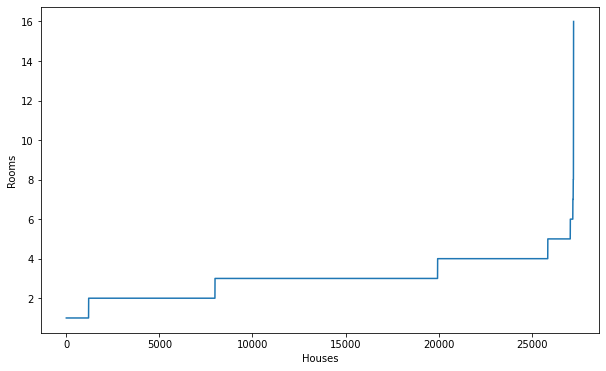

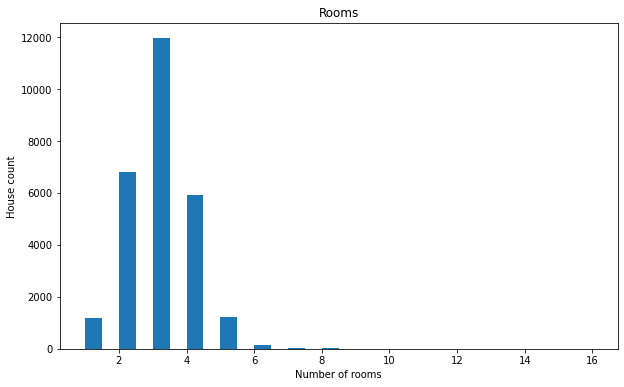

count    27247.000000
mean         2.992293
std          0.954795
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

There are 0 properties with a value of 0 for Rooms


In [175]:
check_float_column(df, "Rooms", "Number of rooms")
# most houses seem to value at around 1M-2M AUD

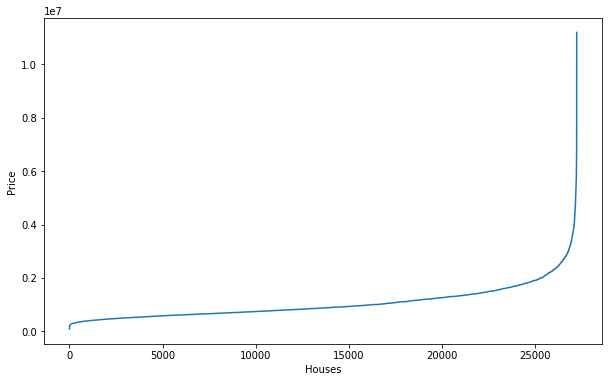

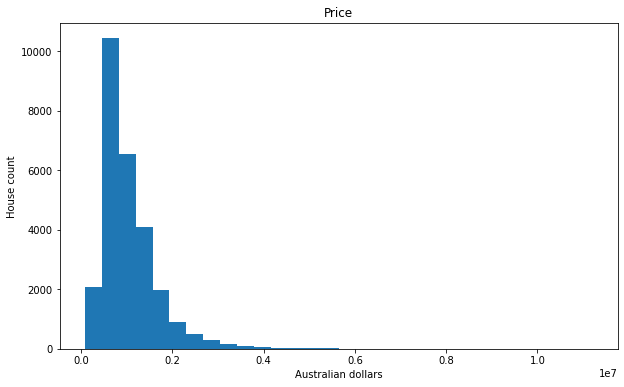

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

There are 0 properties with a value of 0 for Price


In [176]:
check_float_column(df, "Price", "Australian dollars")
# most have 3 rooms, almost uniform distribution
# this is the target for regression

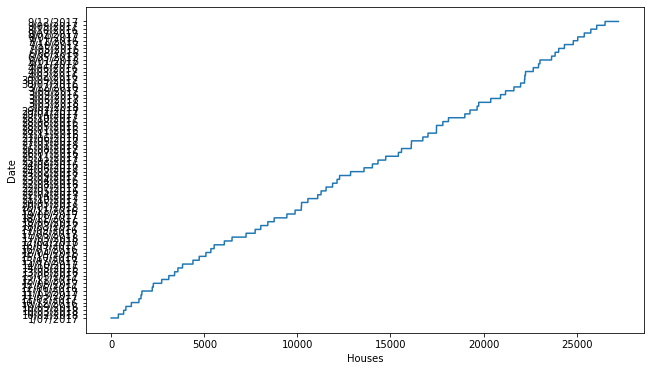

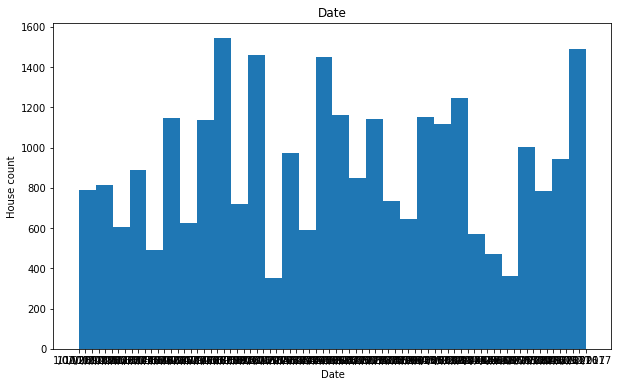

count          27247
unique            78
top       28/10/2017
freq             879
Name: Date, dtype: object

There are 0 properties with a value of 0 for Date


In [177]:
check_float_column(df, "Date", "Date")
# TODO: fix overlapping date labels in plot

Column has 1 NaN values! Replacing them with -1


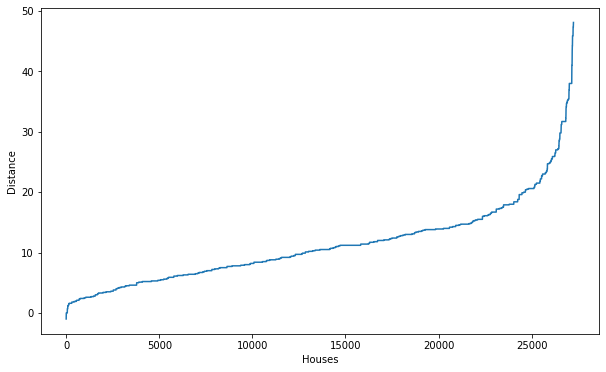

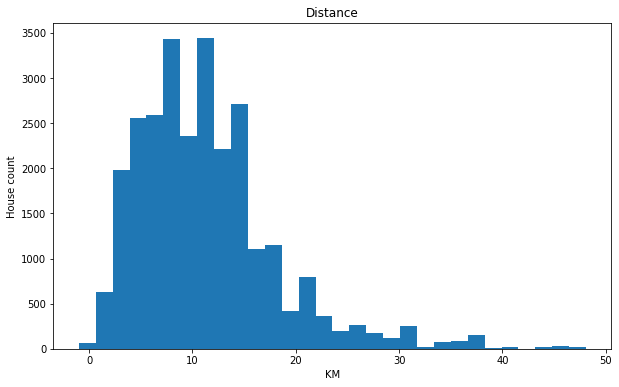

count    27246.000000
mean        11.280276
std          6.787469
min          0.000000
25%          6.400000
50%         10.500000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

There are 58 properties with a value of 0 for Distance


In [178]:
check_float_column(df, "Distance", "KM")

Column has 1 NaN values! Replacing them with -1


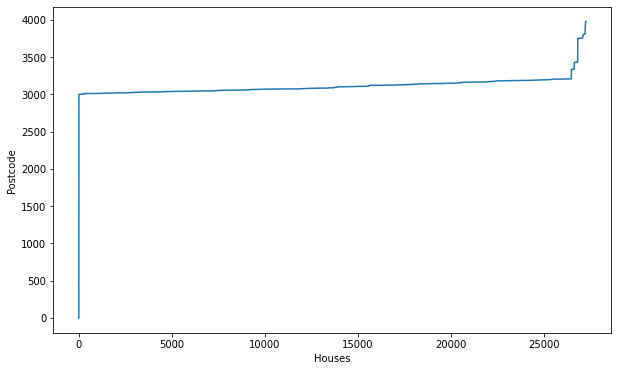

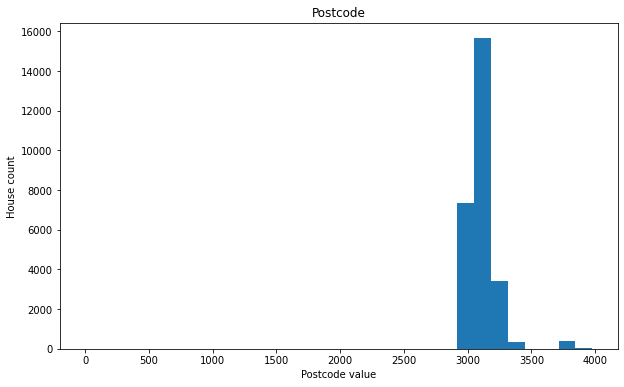

count    27246.000000
mean      3113.796080
std        111.139676
min       3000.000000
25%       3046.000000
50%       3088.000000
75%       3153.000000
max       3978.000000
Name: Postcode, dtype: float64

There are 0 properties with a value of 0 for Postcode


In [179]:
check_float_column(df, "Postcode", "Postcode value")

Column has 6441 NaN values! Replacing them with 3.0


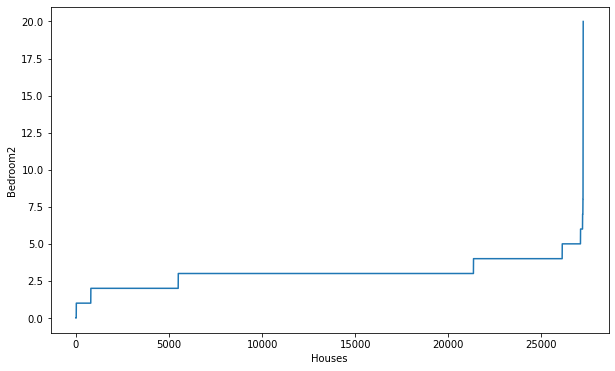

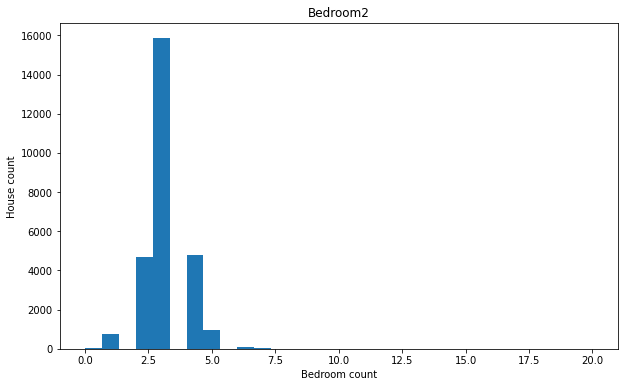

count    20806.000000
mean         3.046237
std          0.955122
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: Bedroom2, dtype: float64

There are 16 properties with a value of 0 for Bedroom2


In [180]:
# we can replace this value with most common number of bedrooms
most_common_no_of_bedrooms = df['Bedroom2'].mode()[0]
check_float_column(df, "Bedroom2", "Bedroom count", nan_replacement=most_common_no_of_bedrooms)

Column has 6447 NaN values! Replacing them with 1.0


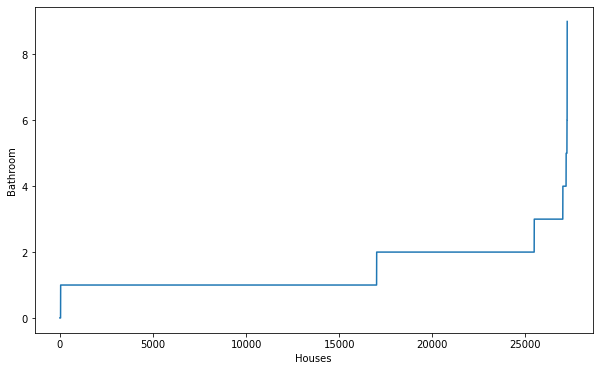

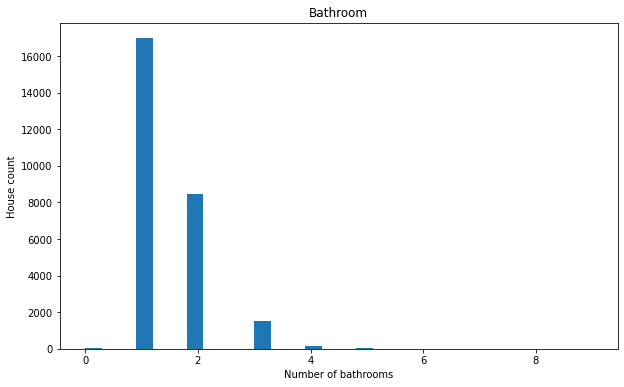

count    20800.000000
mean         1.591683
std          0.700880
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: Bathroom, dtype: float64

There are 34 properties with a value of 0 for Bathroom


In [181]:
most_common_no_of_bathrooms = df['Bathroom'].mode()[0]
check_float_column(df, "Bathroom", "Number of bathrooms", nan_replacement=most_common_no_of_bathrooms)

Column has 6824 NaN values! Replacing them with 2.0


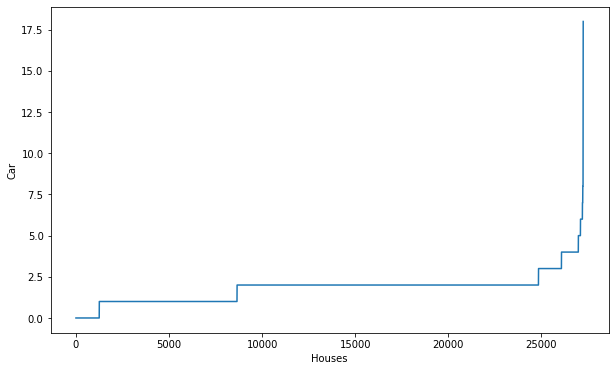

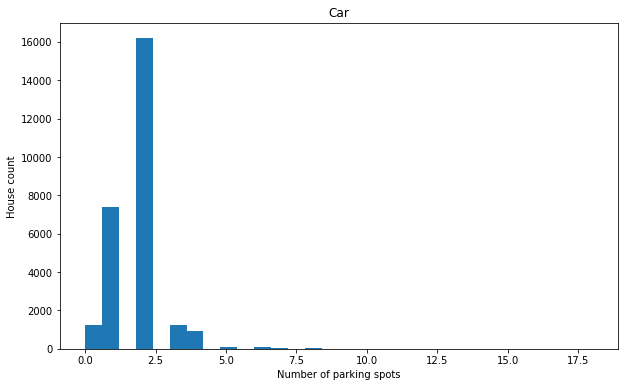

count    20423.000000
mean         1.715370
std          0.994216
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         18.000000
Name: Car, dtype: float64

There are 1251 properties with a value of 0 for Car


In [182]:
most_common_no_of_pspots = df['Car'].mode()[0]
check_float_column(df, "Car", "Number of parking spots", nan_replacement=most_common_no_of_pspots)

In [185]:
# there seem to be a few properties with misleading landsize eg. 433014.000000
old_size = len(df)
df = df.drop(df[df["Landsize"] > 5000].index)
print(f'Dropped {old_size - len(df)} entries due to bad landsize data')

Dropped 82 entries due to bad landsize data


Column has 9265 NaN values! Replacing them with 490.85569832402234


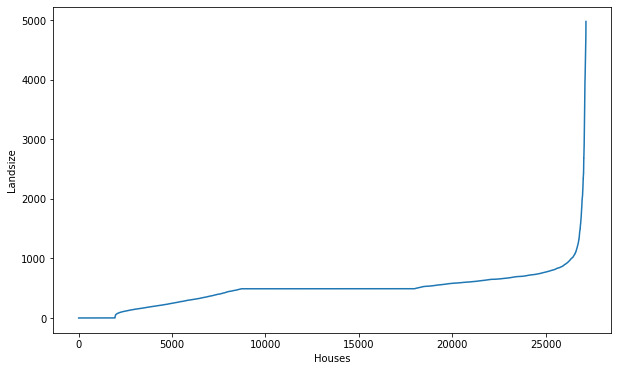

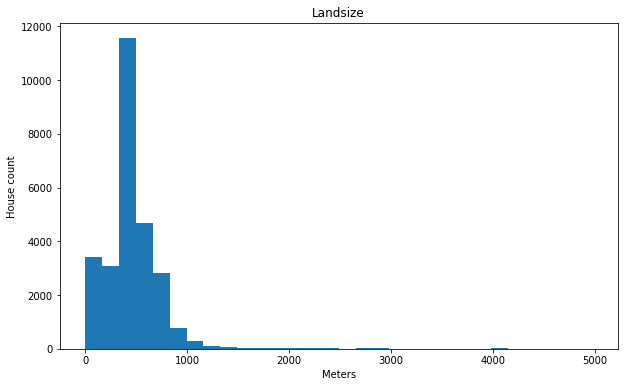

count    17900.000000
mean       490.855698
std        420.929552
min          0.000000
25%        217.000000
50%        510.000000
75%        661.000000
max       4977.000000
Name: Landsize, dtype: float64

There are 1942 properties with a value of 0 for Landsize


In [186]:
avg_landsize = df['Landsize'].mean()
check_float_column(df, "Landsize", "Meters", nan_replacement=avg_landsize)

Column has 16552 NaN values! Replacing them with 152.82693900876285


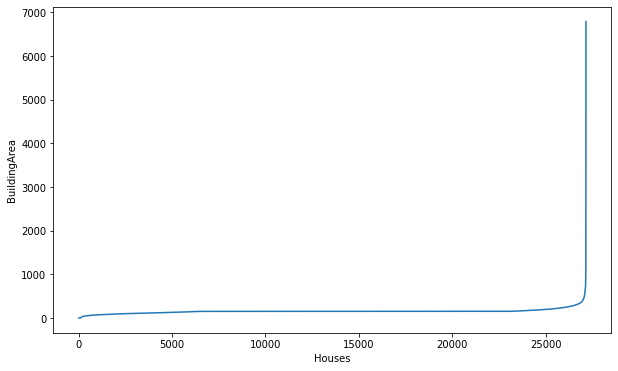

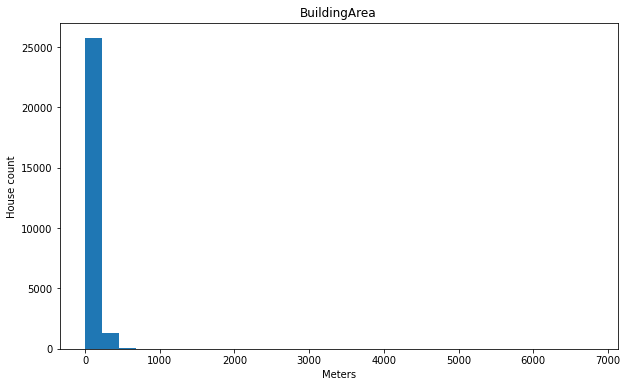

count    10613.000000
mean       152.826939
std        130.986401
min          0.000000
25%        100.000000
50%        133.000000
75%        182.000000
max       6791.000000
Name: BuildingArea, dtype: float64

There are 60 properties with a value of 0 for BuildingArea


In [188]:
# too many missing values should drop
avg_b_area = df['BuildingArea'].mean()
check_float_column(df, "BuildingArea", "Meters", nan_replacement=avg_b_area)

Column has 15130 NaN values! Replacing them with -1


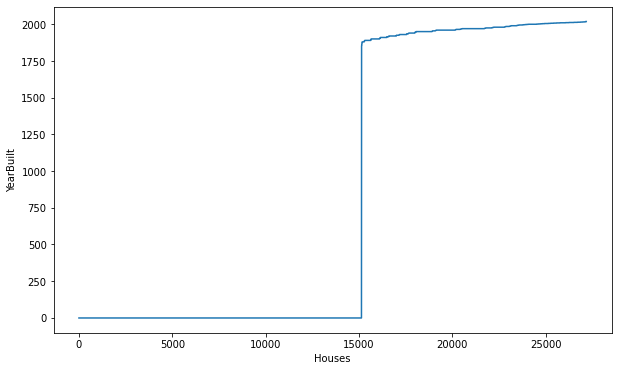

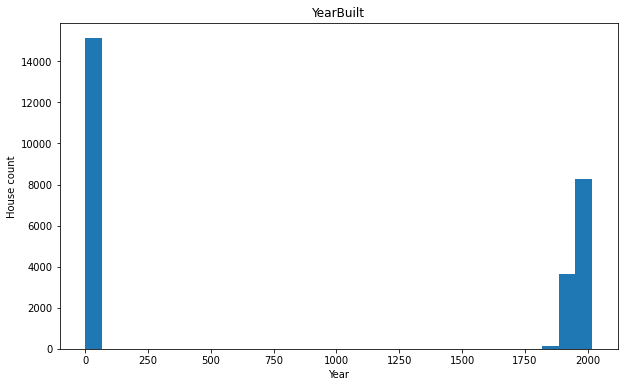

count    12035.000000
mean      1966.516327
std         36.749946
min       1196.000000
25%       1950.000000
50%       1970.000000
75%       2000.000000
max       2019.000000
Name: YearBuilt, dtype: float64

There are 0 properties with a value of 0 for YearBuilt


In [189]:
# too many missing values should drop
check_float_column(df, "YearBuilt", "Year")

Column has 3 NaN values! Replacing them with -1


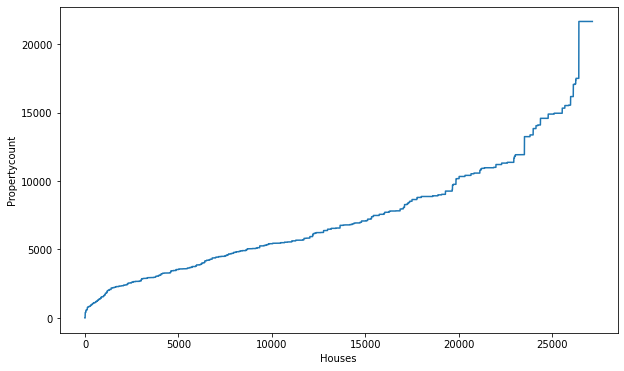

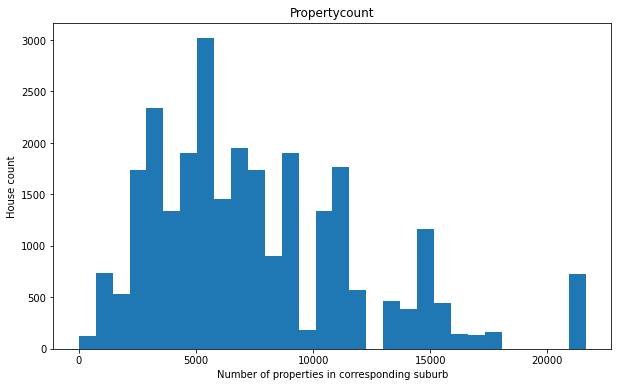

count    27162.000000
mean      7567.169502
std       4490.483036
min        121.000000
25%       4294.000000
50%       6567.000000
75%      10412.000000
max      21650.000000
Name: Propertycount, dtype: float64

There are 0 properties with a value of 0 for Propertycount


In [191]:
check_float_column(df, "Propertycount", "Number of properties in corresponding suburb")